In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

ARQ = '../data/processed/op-exp-pre-embarque.pickle'

df = pd.read_pickle(ARQ)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [71]:
# df.info()
print('Visão Geral dos Dados')

valor_total = df['valor_da_operacao_em_reais'].sum()
num_operacoes = len(df)
valor_medio = df['valor_da_operacao_em_reais'].mean()

data_inicio = df['data_da_contratacao'].min().strftime('%d/%m/%Y')
data_fim = df['data_da_contratacao'].max().strftime('%d/%m/%Y')

print(f'Período da análise: de {data_inicio} a {data_fim}')
print(f'Número total de operações: {num_operacoes:,}'.replace(',', '.'))
print(f'Valor total das operações: R$ {valor_total:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
print(f'Valor médio por operação: R$ {valor_medio:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

print('\nEstatísticas Descritivas:')
print(df.describe())

Visão Geral dos Dados
Período da análise: de 08/01/2002 a 16/06/2025
Número total de operações: 7.189
Valor total das operações: R$ 130.470.257.363,00
Valor médio por operação: R$ 18.148.596,10

Estatísticas Descritivas:
       municipio_codigo            data_da_contratacao  \
count      7.189000e+03                           7189   
mean       3.713187e+06  2009-01-02 17:48:37.957991168   
min        0.000000e+00            2002-01-08 00:00:00   
25%        3.515004e+06            2004-10-08 00:00:00   
50%        3.550308e+06            2009-04-06 00:00:00   
75%        4.209102e+06            2012-01-04 00:00:00   
max        9.999999e+06            2025-06-16 00:00:00   
std        5.654400e+05                            NaN   

       valor_da_operacao_em_reais  valor_desembolsado_em_reais          ano  
count                7.189000e+03                 7.189000e+03  7189.000000  
mean                 1.814860e+07                 1.812492e+07  2008.430936  
min                  5

In [11]:
print("\nOperações por UF:")
print(df['uf'].value_counts().head(10))

print("\nOperações por Porte do Cliente:")
print(df['porte_do_cliente'].value_counts())

print("\nOperações por Setor BNDES:")
print(df['setor_bndes'].value_counts().head(10))


Operações por UF:
uf
SP    3014
RS    1397
SC     927
PR     603
MG     433
CE     181
RJ     151
BA     116
ES     105
PE      98
Name: count, dtype: int64

Operações por Porte do Cliente:
porte_do_cliente
GRANDE     5844
MÉDIA      1204
PEQUENA      93
MICRO        48
Name: count, dtype: int64

Operações por Setor BNDES:
setor_bndes
INDUSTRIA            6718
COMERCIO/SERVICOS     278
AGROPECUÁRIA          193
Name: count, dtype: int64


## Pergunta 1: Como o crédito foi distribuído entre empresas de diferentes portes?

#### A análise da distribuição do crédito revela uma relação complexa entre o porte da empresa e o valor das operações. Embora a tendência geral mostre que empresas maiores acessam valores de crédito mais elevados, a progressão não é estritamente linear nas categorias menores. A categoria PEQUENA apresenta o menor valor mediano entre todas, indicando que, tipicamente, suas operações são as de menor montante. Curiosamente, a mediana das operações para empresas MICRO é ligeiramente superior à das pequenas. A partir daí, a tendência se confirma, com as empresas de porte MÉDIO e GRANDE acessando valores progressivamente maiores. Além disso, é nítido que a variabilidade e a presença de operações de altíssimo valor (outliers) aumentam drasticamente para as grandes empresas, que operam em uma escala de valores muito superior às demais.

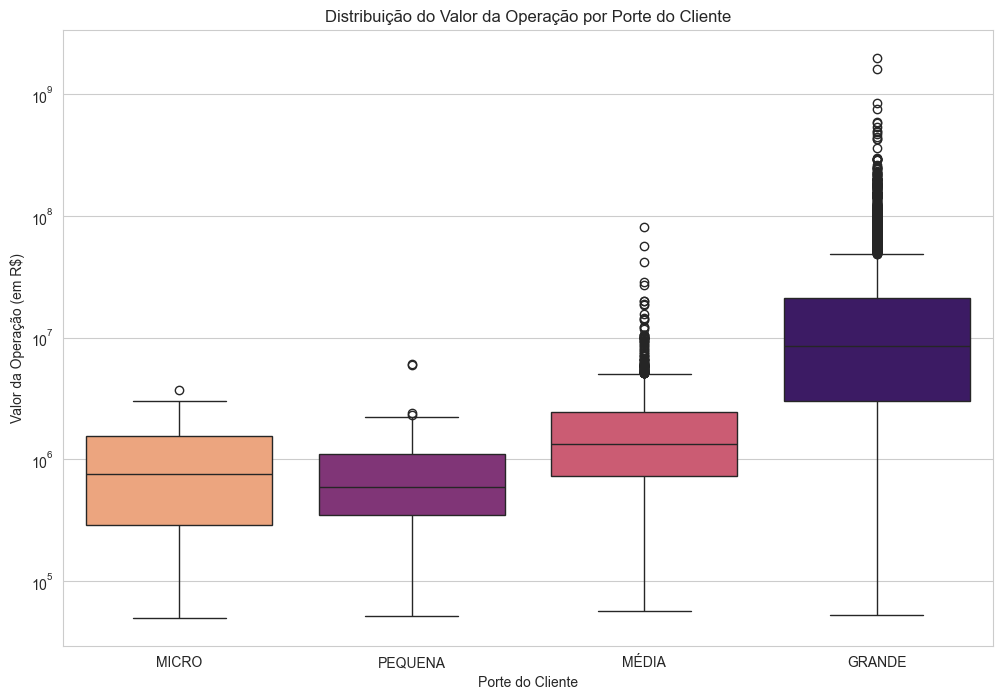

In [77]:
sns.boxplot(x='porte_do_cliente', y='valor_da_operacao_em_reais', hue= 'porte_do_cliente', data=df, palette='magma', order=['MICRO', 'PEQUENA', 'MÉDIA', 'GRANDE'])
plt.title('Distribuição do Valor da Operação por Porte do Cliente')
plt.xlabel('Porte do Cliente')
plt.ylabel('Valor da Operação (em R$)')
plt.yscale('log')
plt.show()

## Pergunta 2: Quais setores da economia foram mais beneficiados?

#### Os dados indicam uma concentração esmagadora dos recursos na INDÚSTRIA. Com um volume total superior a R$ 125 bilhões, este setor se posiciona como o principal beneficiário, recebendo uma quantia ordens de magnitude maior que os demais. O setor de COMÉRCIO/SERVIÇOS, em segundo lugar, acumulou aproximadamente R$ 4.2 bilhões, enquanto a AGROPECUÁRIA na terceira posição. Isso evidencia que, para esta linha de crédito específica, o foco do BNDES é majoritariamente industrial.

In [80]:
valor_por_setor = df.groupby('setor_bndes')['valor_da_operacao_em_reais'].sum().sort_values(ascending=False).reset_index()

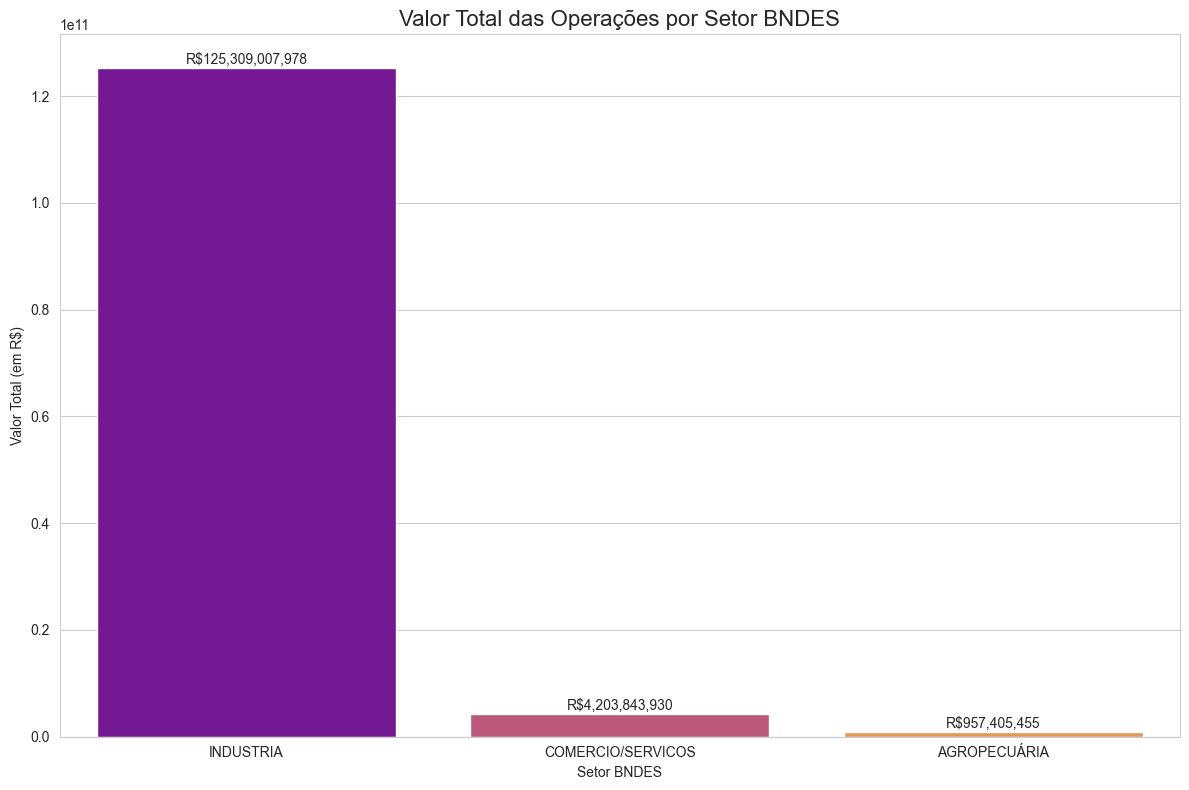

In [91]:
grafico = sns.barplot(data=valor_por_setor, x='setor_bndes', y='valor_da_operacao_em_reais',hue='setor_bndes', palette='plasma', legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R${:,.0f}', padding=0.8, size=10)

plt.title("Valor Total das Operações por Setor BNDES", fontsize=16)
plt.xlabel("Setor BNDES")
plt.ylabel("Valor Total (em R$)")
plt.tight_layout()
plt.show()

## Pergunta 3: Como o volume de crédito evoluiu ao longo do tempo?

#### A evolução do volume de crédito ao longo dos anos exibe um comportamento volátil, com picos e vales acentuados. O período de maior atividade ocorreu no início da década de 2010, com um pico histórico em 2010, quando o valor anual das operações se aproximou de R$15 bilhões. Após esse auge, seguiu-se um período de instabilidade e tendência de queda, atingindo os níveis mais baixos por volta de 2017. Os anos mais recentes sugerem uma leve recuperação, embora ainda distantes dos patamares históricos.

In [44]:
df['ano'] = df['data_da_contratacao'].dt.year
dados_anuais = df.groupby('ano')['valor_da_operacao_em_reais'].sum().reset_index()

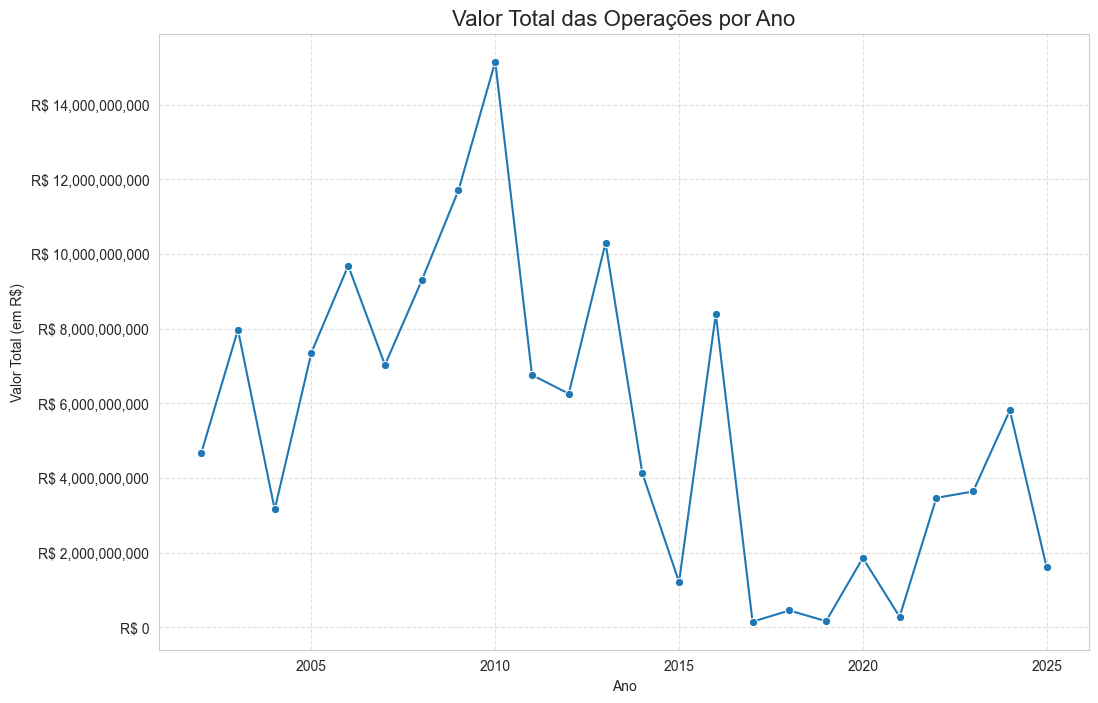

In [92]:
grafico = sns.lineplot(data=dados_anuais, x='ano', y='valor_da_operacao_em_reais', marker='o')
fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
grafico.yaxis.set_major_formatter(tick)
plt.ylabel("Valor Total (em R$)")
plt.title('Valor Total das Operações por Ano', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Valor Total (em R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Pergunta 4: Qual a distribuição geográfica do crédito?

#### A distribuição geográfica do crédito é marcadamente concentrada nas regiões Sudeste e Sul do Brasil. O estado de São Paulo (SP) lidera de forma absoluta, com mais de R$72 bilhões em operações, valor que supera soma dos estados subsequentes. Na sequência, destacam-se Rio Grande do Sul (RS), Santa Catarina (SC) e Minas Gerais (MG). Fica clara a grande disparidade na alocação dos recursos, com uma minoria de estados concentrando a vasta maioria do capital.

In [46]:
valor_por_uf = df.groupby('uf')['valor_da_operacao_em_reais'].sum().sort_values(ascending=False).reset_index()

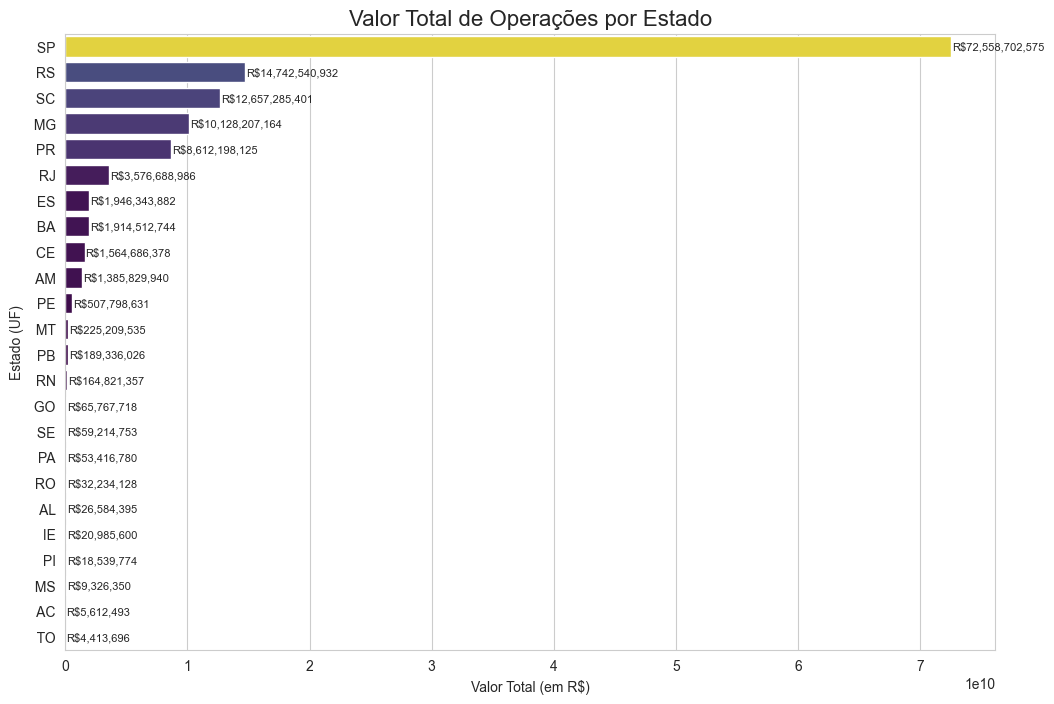

In [66]:
grafico = sns.barplot(data=valor_por_uf, x='valor_da_operacao_em_reais', y='uf',hue='valor_da_operacao_em_reais', palette='viridis', legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R${:,.0f}', padding=0.8, size=8)

plt.title('Valor Total de Operações por Estado', fontsize=16)
plt.xlabel('Valor Total (em R$)')
plt.ylabel('Estado (UF)')
plt.show()

## Pergunta 5: Quais as 5 instituições financeiras que repassam o maior valor total?

#### O repasse do crédito é dominado pelos grandes bancos comerciais do país. Banco Bradesco, Itaú Unibanco e Banco do Brasil formam o grupo líder, atuando em um patamar muito similar e intermediando, cada um, cerca de R$ 25 bilhões. O Banco Santander aparece na sequência com um volume significativo de aproximadamente R$ 13 bilhões. É notável a presença de uma categoria "SEM NOME" entre as cinco primeiras, movimentando quase R$ 8 bilhões. Essa observação indica que uma parcela relevante das operações é registrada na base de dados original do BNDES sem a identificação explícita do agente financeiro.

In [111]:
valor_por_inst = df.groupby('instituicao_financeira_credenciada')['valor_da_operacao_em_reais'].sum().sort_values(ascending=False).head(5).reset_index()

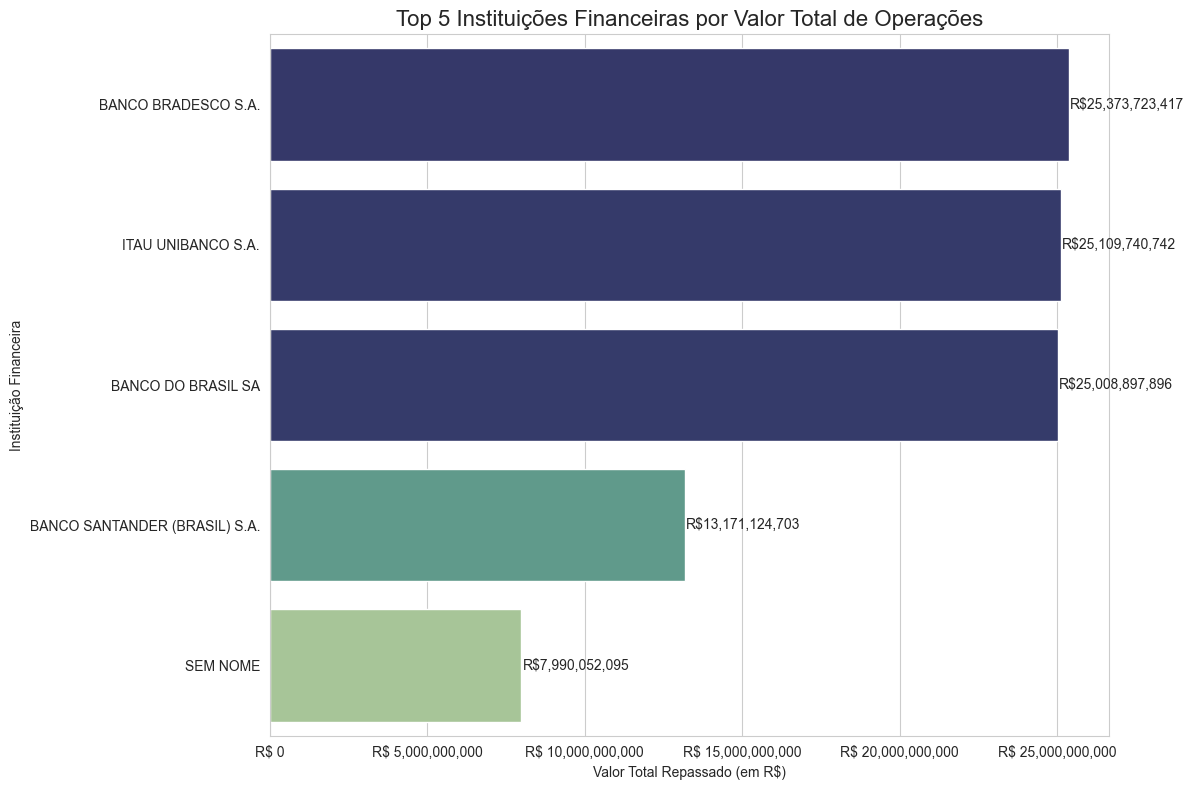

In [112]:
grafico = sns.barplot(data=valor_por_inst, x='valor_da_operacao_em_reais', y='instituicao_financeira_credenciada',hue='valor_da_operacao_em_reais', palette='crest', legend=False)

for container in grafico.containers:
    grafico.bar_label(container, fmt='R${:,.0f}', padding=0.8, size=10)

fmt = 'R$ {x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
grafico.xaxis.set_major_formatter(tick)

plt.title("Top 5 Instituições Financeiras por Valor Total de Operações", fontsize=16)
plt.xlabel("Valor Total Repassado (em R$)")
plt.ylabel("Instituição Financeira")
plt.tight_layout()
plt.show()

In [105]:
df['instituicao_financeira_credenciada']

0       BOSTON NEGOCIOS E PARTICIPACOES LTDA.
2          BANCO BRADESCO FINANCIAMENTOS S.A.
3                          ITAU UNIBANCO S.A.
4                              BANCO FIBRA SA
5                         BANCO BRADESCO S.A.
                        ...                  
7236                       ITAU UNIBANCO S.A.
7237                      BANCO BRADESCO S.A.
7238                          BANCO SAFRA S A
7239                          BANCO SAFRA S A
7240                                 SEM NOME
Name: instituicao_financeira_credenciada, Length: 7189, dtype: object